In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y.reshape(-1, 1))

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
def initialize_parameters(n_features, n_classes):
    W = np.random.randn(n_features, n_classes) * 0.01
    b = np.zeros((1, n_classes))
    return W, b

In [7]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [9]:
def forward_propagation(X, W, b):
    Z = np.dot(X, W) + b
    A = softmax(Z)
    return A

In [11]:
def compute_loss(Y, A):
    m = Y.shape[0]
    loss = -np.mean(np.sum(Y * np.log(A + 1e-9), axis=1))
    return loss

In [13]:
def compute_accuracy(Y, A):
    predictions = np.argmax(A, axis=1)
    labels = np.argmax(Y, axis=1)
    return np.mean(predictions == labels) * 100

In [15]:
def train_softmax(X, Y, n_classes, learning_rate=0.1, epochs=1000):
    n_samples, n_features = X.shape
    W, b = initialize_parameters(n_features, n_classes)
    losses = []
    for epoch in range(epochs):
        A = forward_propagation(X, W, b)
        loss = compute_loss(Y, A)
        losses.append(loss)
        dW = np.dot(X.T, (A - Y)) / n_samples
        db = np.sum(A - Y, axis=0, keepdims=True) / n_samples
        W -= learning_rate * dW
        b -= learning_rate * db
        if epoch % 100 == 0:
            acc = compute_accuracy(Y, A)
            print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.2f}%")
    return W, b, losses

In [17]:
def predict(X, W, b):
    A = forward_propagation(X, W, b)
    return np.argmax(A, axis=1)

In [19]:
n_classes = 3
W, b, losses = train_softmax(X_train, Y_train, n_classes, learning_rate=0.1, epochs=1000)

Epoch 0: Loss = 1.0925, Accuracy = 76.67%
Epoch 100: Loss = 0.3397, Accuracy = 90.00%
Epoch 200: Loss = 0.2702, Accuracy = 90.00%
Epoch 300: Loss = 0.2289, Accuracy = 93.33%
Epoch 400: Loss = 0.2009, Accuracy = 94.17%
Epoch 500: Loss = 0.1805, Accuracy = 95.83%
Epoch 600: Loss = 0.1651, Accuracy = 96.67%
Epoch 700: Loss = 0.1530, Accuracy = 96.67%
Epoch 800: Loss = 0.1432, Accuracy = 96.67%
Epoch 900: Loss = 0.1352, Accuracy = 96.67%


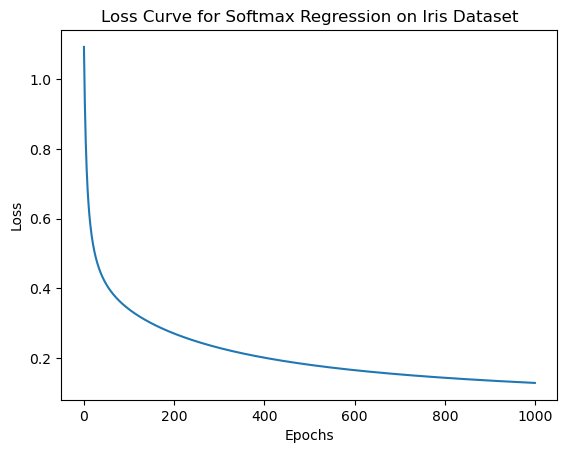

In [21]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve for Softmax Regression on Iris Dataset")
plt.show()

In [23]:
A_test = forward_propagation(X_test, W, b)
test_accuracy = compute_accuracy(Y_test, A_test)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 100.00%


In [25]:
X_sample = np.array([[5.1, 3.5, 1.4, 0.2]])
X_sample = scaler.transform(X_sample)
prediction = predict(X_sample, W, b)
print(f"Predicted Class: {iris.target_names[prediction][0]}")

Predicted Class: setosa
